In [63]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection,metrics
from statistics import mean
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [64]:
data = pd.read_csv('adult.data')
data.columns = 'age work_class final_weight education edu_num marital_status occupation '\
               'relationship race gender cap_gain cap_loss work_hours country income'.split(' ')

In [65]:
data.head()

,age,work_class,final_weight,education,edu_num,marital_status,occupation,relationship,race,gender,cap_gain,cap_loss,work_hours,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Checking for Null values

In [66]:
data.replace(' ?', np.NaN,inplace=True)
data.isnull().sum()

age                  0
work_class        1836
final_weight         0
education            0
edu_num              0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
cap_gain             0
cap_loss             0
work_hours           0
country            583
income               0
dtype: int64

# Drooping Null values If any

In [67]:
data.dropna(how='any',inplace=True)
data.isnull().sum()

age               0
work_class        0
final_weight      0
education         0
edu_num           0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
cap_gain          0
cap_loss          0
work_hours        0
country           0
income            0
dtype: int64

Converting the string label into binary classification (1 or 0)

In [68]:
data['income']=data["income"].map({' <=50K':0,' >50K':1})

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30161 non-null  int64 
 1   work_class      30161 non-null  object
 2   final_weight    30161 non-null  int64 
 3   education       30161 non-null  object
 4   edu_num         30161 non-null  int64 
 5   marital_status  30161 non-null  object
 6   occupation      30161 non-null  object
 7   relationship    30161 non-null  object
 8   race            30161 non-null  object
 9   gender          30161 non-null  object
 10  cap_gain        30161 non-null  int64 
 11  cap_loss        30161 non-null  int64 
 12  work_hours      30161 non-null  int64 
 13  country         30161 non-null  object
 14  income          30161 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Nominal->
work_class, marital_status, race, gender, country

Ordinal->
education, occupation

continous->
age, work_hours

In [70]:
counts = list(data['country'].value_counts())
countries = list(data['country'].value_counts().index)
countries_100 = list()
for idx, i in enumerate(counts):
  if i > 50:
    countries_100.append(countries[idx])

data = data[data['country'].isin(countries_100)]

In [71]:
data.head()

,age,work_class,final_weight,education,edu_num,marital_status,occupation,relationship,race,gender,cap_gain,cap_loss,work_hours,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [72]:
data.head()

,age,work_class,final_weight,education,edu_num,marital_status,occupation,relationship,race,gender,cap_gain,cap_loss,work_hours,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [73]:
def plot_feature(feature):
  var = sorted(data[feature].value_counts().to_dict().keys(), key=lambda x:x.lower())
  var_0 = dict( sorted(data[data.income == 0][feature].value_counts().to_dict().items(), key=lambda x: x[0].lower()) )
  var_1 = dict( sorted(data[data.income == 1][feature].value_counts().to_dict().items(), key=lambda x: x[0].lower()) )

  labels = var
  ms_0 = [j for i, j in var_0.items()]
  ms_1 = [j for i, j in var_1.items()]
  plt.figure(figsize=(15,10))
  plt.bar(labels, ms_0, label='<50K')
  plt.bar(labels, ms_1, label='<50K')
  plt.legend()
  plt.xticks(rotation=45)
  plt.show()

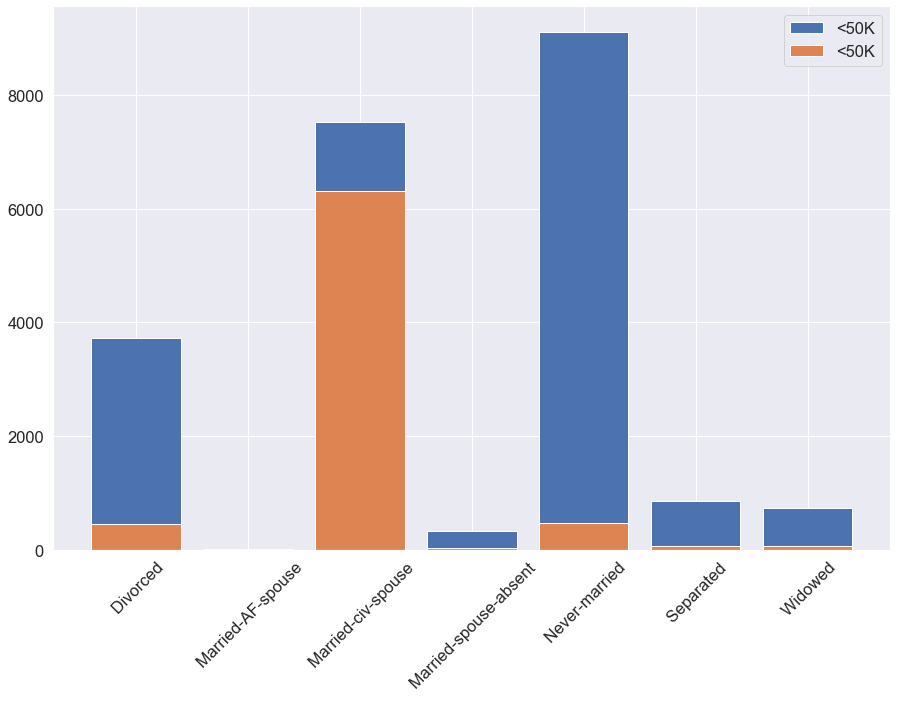

In [74]:
plot_feature('marital_status')

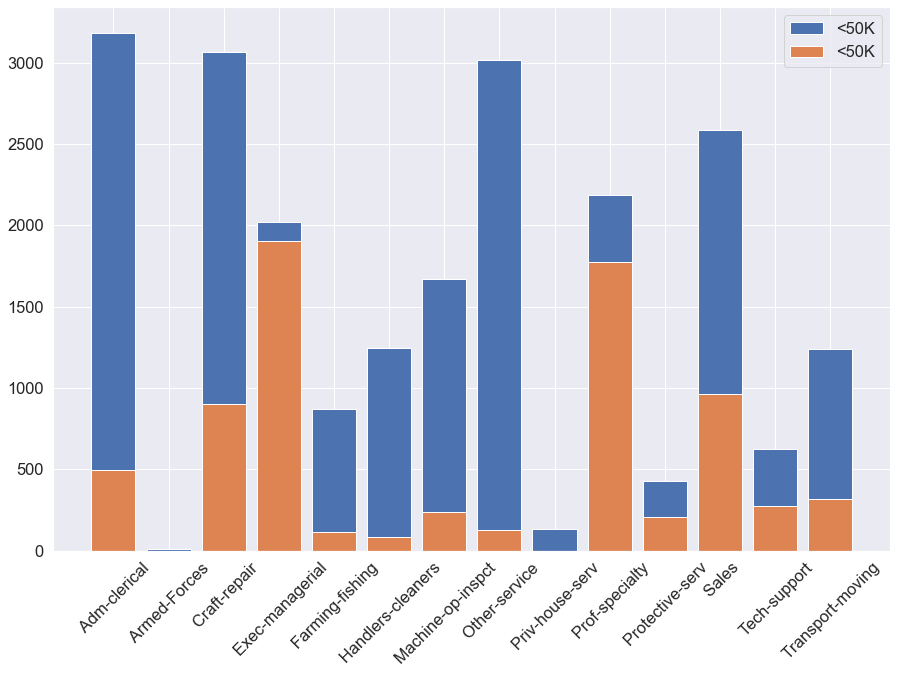

In [75]:
plot_feature('occupation')

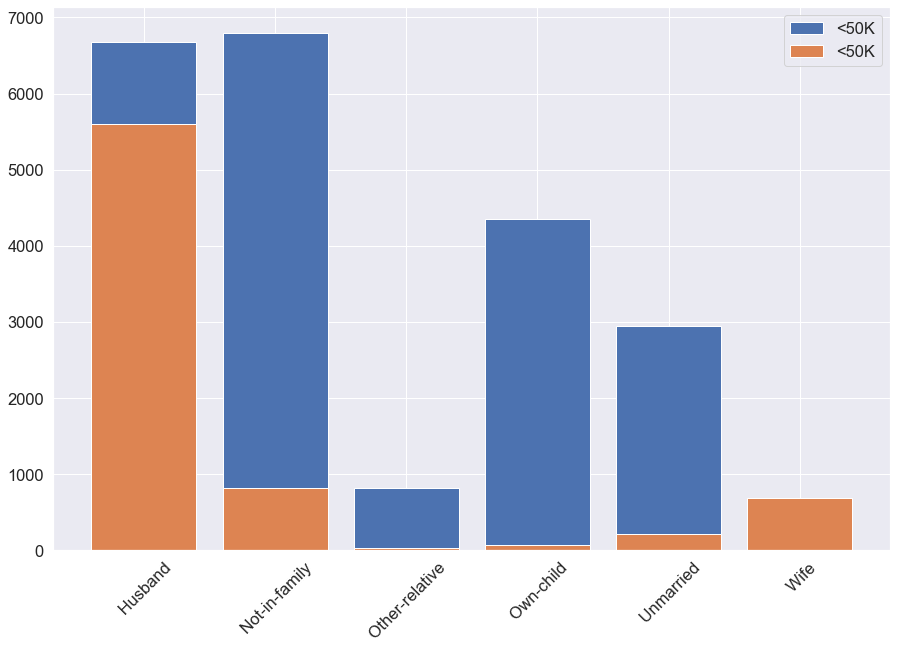

In [76]:
plot_feature('relationship')

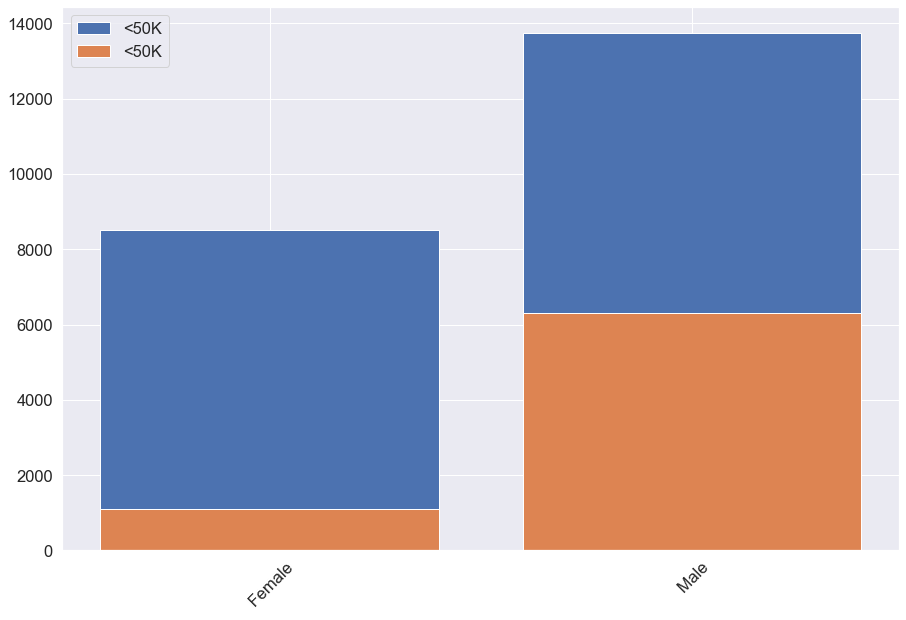

In [77]:
plot_feature('gender')

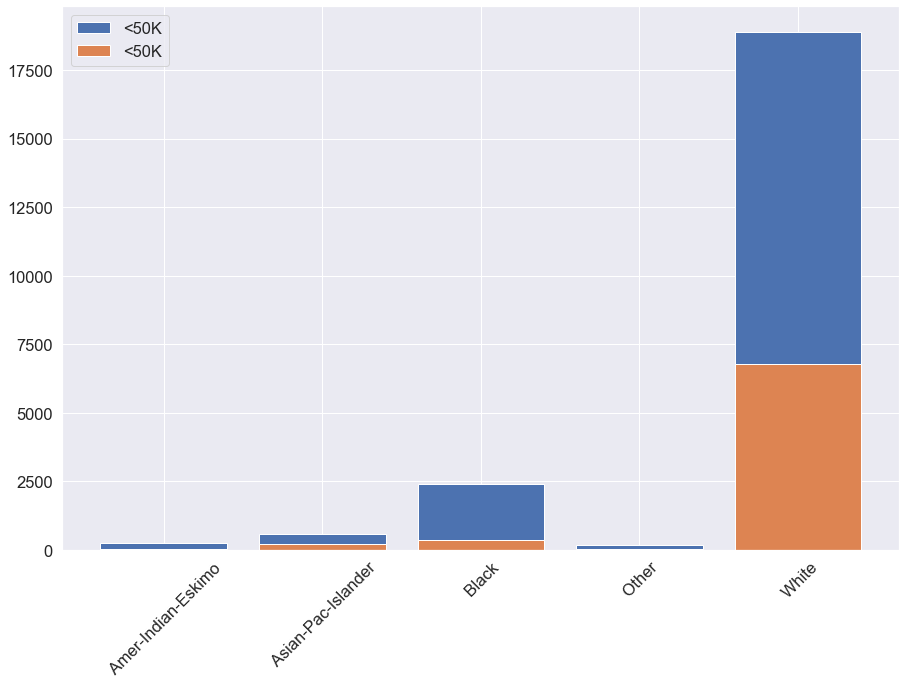

In [78]:
plot_feature('race')

In [79]:
min_max_scaler = preprocessing.MinMaxScaler()
continous_types = 'age edu_num work_hours'.split(' ')
scaled_data = min_max_scaler.fit_transform(data[continous_types])
data[continous_types] = pd.DataFrame(scaled_data)

In [80]:
cap_gain = data['cap_gain'].value_counts().to_dict()
print(f'percentage of data with cap gain value = 0 : {100*cap_gain[0]/30161} %')
cap_loss = data['cap_loss'].value_counts().to_dict()
print(f'percentage of data with cap loss value = 0 : {100*cap_loss[0]/30161} %')

percentage of data with cap gain value = 0 : 90.08985113225688 %
percentage of data with cap loss value = 0 : 93.7336295215676 %


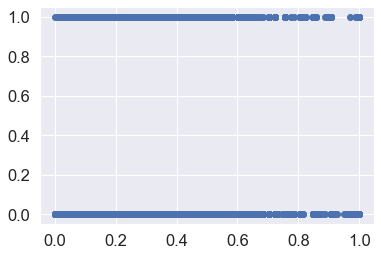

In [81]:
plt.scatter(data['work_hours'], data['income'])

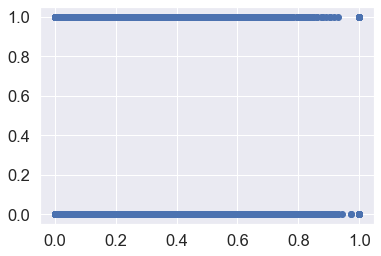

In [82]:
plt.scatter(data['age'], data['income'])

In [83]:
print(f"Correlation between age and income is very low i.e. {data['age'].corr(data['income'])}.")

Correlation between age and income is very low i.e. 0.009142245358149755.


In [84]:
data.drop(labels=['final_weight', 'education', 'cap_gain', 'cap_loss', 'work_class', 'age', 'work_hours'], axis=1, inplace=True)

In [85]:
occu_dict = dict(sorted(data[data.income == 1]['occupation'].value_counts().to_dict().items(), key=lambda x: x[1]))
for i, j in enumerate(occu_dict.keys()):
  occu_dict[j] = i

data['occupation'] = data['occupation'].map(occu_dict)

In [86]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,edu_num,occupation,income,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,...,country_ Italy,country_ Jamaica,country_ Japan,country_ Mexico,country_ Philippines,country_ Poland,country_ Puerto-Rico,country_ South,country_ United-States,country_ Vietnam
0,0.800000,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.533333,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.400000,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.800000,12,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.866667,13,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
data_encoded.dropna(how='any',inplace=True)
data_encoded.isnull().sum()

edu_num                                  0
occupation                               0
income                                   0
marital_status_ Divorced                 0
marital_status_ Married-AF-spouse        0
marital_status_ Married-civ-spouse       0
marital_status_ Married-spouse-absent    0
marital_status_ Never-married            0
marital_status_ Separated                0
marital_status_ Widowed                  0
relationship_ Husband                    0
relationship_ Not-in-family              0
relationship_ Other-relative             0
relationship_ Own-child                  0
relationship_ Unmarried                  0
relationship_ Wife                       0
race_ Amer-Indian-Eskimo                 0
race_ Asian-Pac-Islander                 0
race_ Black                              0
race_ Other                              0
race_ White                              0
gender_ Female                           0
gender_ Male                             0
country_ Ca

In [88]:
y = data_encoded['income']
x = data_encoded.loc[:, data_encoded.columns != 'income']

In [89]:
data_encoded.columns

Index(['edu_num', 'occupation', 'income', 'marital_status_ Divorced',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'gender_ Female', 'gender_ Male', 'country_ Canada', 'country_ China',
       'country_ Columbia', 'country_ Cuba', 'country_ Dominican-Republic',
       'country_ El-Salvador', 'country_ England', 'country_ Germany',
       'country_ Guatemala', 'country_ India', 'country_ Italy',
       'country_ Jamaica', 'country_ Japan', 'country_ Mexico',
       'country_ Philippines', 'country_ Po

In [90]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.2)

# SVM RBF

In [122]:
svm_k_rbf = svm.SVC(kernel='rbf')
svm_fitted_rbf = svm_k_rbf.fit(xtrain, ytrain)

ypred_rbf = svm_k_rbf.predict(xtest)
ypred_rbf1 = svm_k_rbf.predict(xtrain)
print("Test data")
print(metrics.classification_report(ytest, ypred_rbf))
print("Train data")
accuracy_rbf = metrics.accuracy_score(ytest, ypred_rbf)
print(metrics.classification_report(ytrain, ypred_rbf1))
print(f'accuracy = {accuracy_rbf}')
accuracy_rbf = metrics.accuracy_score(ytrain, ypred_rbf1)
print(f'accuracy = {accuracy_rbf}')

Test data
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4077
           1       0.70      0.42      0.53      1336

    accuracy                           0.81      5413
   macro avg       0.77      0.68      0.71      5413
weighted avg       0.80      0.81      0.80      5413

Train data
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     16268
           1       0.69      0.41      0.51      5382

    accuracy                           0.81     21650
   macro avg       0.76      0.67      0.70     21650
weighted avg       0.79      0.81      0.79     21650

accuracy = 0.8132274154812489
accuracy = 0.8069745958429562


0.8173979487676597


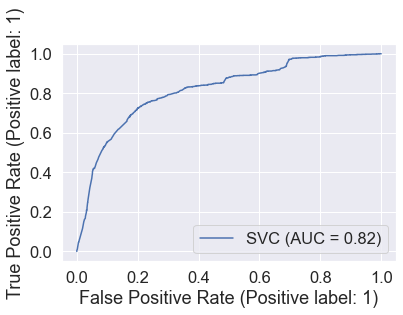

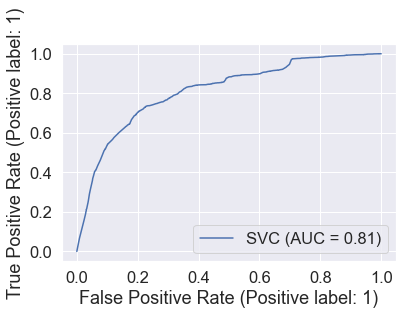

In [116]:
print(metrics.roc_auc_score(ytest, svm_fitted_rbf.decision_function(xtest)))

metrics.plot_roc_curve(svm_fitted_rbf, xtest, ytest)
plt.show()
metrics.plot_roc_curve(svm_fitted_rbf, xtrain, ytrain)
plt.show()

# SVM Linear

In [121]:
svm_k_lin = svm.SVC(kernel='linear', C=1)
svm_lin_fitted = svm_k_lin.fit(xtrain, ytrain)

ypred_lin = svm_k_lin.predict(xtest)
ypred_lin1 = svm_k_lin.predict(xtrain)
print("Test data")
print(metrics.classification_report(ytest, ypred_lin))
print("Train data")
print(metrics.classification_report(ytrain, ypred_lin1))


accuracy_lin = metrics.accuracy_score(ytest, ypred_lin)
print('Training accuracy = ',metrics.accuracy_score(ytrain, svm_k_lin.predict(xtrain)))
print(f'Testing accuracy = {accuracy_lin}')

Test data
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4077
           1       0.57      0.67      0.62      1336

    accuracy                           0.79      5413
   macro avg       0.73      0.75      0.74      5413
weighted avg       0.81      0.79      0.80      5413

Train data
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     16268
           1       0.56      0.64      0.60      5382

    accuracy                           0.79     21650
   macro avg       0.72      0.74      0.73     21650
weighted avg       0.80      0.79      0.79     21650

Training accuracy =  0.785635103926097
Testing accuracy = 0.7934601884352485


In [94]:
print(metrics.roc_auc_score(ytest, svm_lin_fitted.decision_function(xtest)))

0.852568960680552


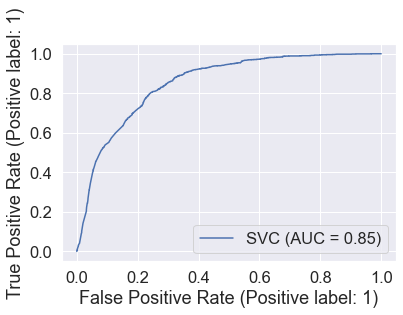

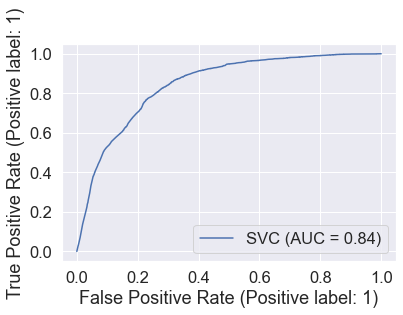

In [117]:
metrics.plot_roc_curve(svm_lin_fitted, xtest, ytest)
plt.show()
metrics.plot_roc_curve(svm_lin_fitted, xtrain, ytrain)
plt.show()

# Gaussian NB

In [96]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(xtrain, ytrain)
GaussianNB()

GaussianNB()

In [98]:
predicted1 = clf.predict(xtrain)
accuracy = metrics.accuracy_score(ytrain, predicted1)
print(f'Mean accuracy score: {accuracy:.3}')
predicted2 = clf.predict(xtest)
accuracy = metrics.accuracy_score(ytest, predicted2)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.585
Mean accuracy score: 0.59


In [100]:
print("Test data")
print(classification_report(ytest, predicted2))
print("Train data")
print(classification_report(ytrain, predicted1))

Test data
              precision    recall  f1-score   support

           0       0.95      0.48      0.64      4077
           1       0.37      0.92      0.53      1336

    accuracy                           0.59      5413
   macro avg       0.66      0.70      0.58      5413
weighted avg       0.81      0.59      0.61      5413

Train data
              precision    recall  f1-score   support

           0       0.95      0.48      0.63     16268
           1       0.37      0.92      0.52      5382

    accuracy                           0.59     21650
   macro avg       0.66      0.70      0.58     21650
weighted avg       0.80      0.59      0.61     21650



[Text(0, 0.5, 'Income > 50 K'), Text(0, 1.5, 'Income < =50 K')]

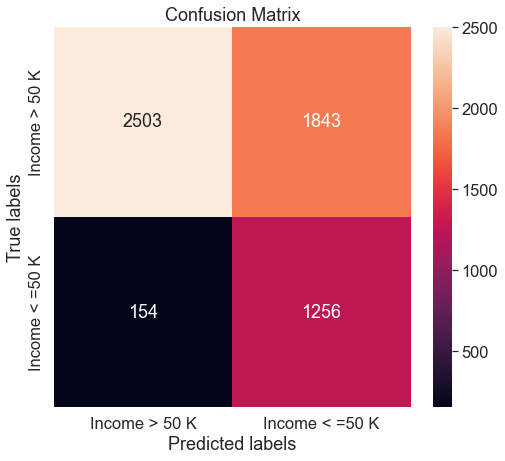

In [48]:
cm = confusion_matrix(ytest, predicted)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['Income > 50 K', 'Income < =50 K'])
ax.yaxis.set_ticklabels(['Income > 50 K', 'Income < =50 K'])

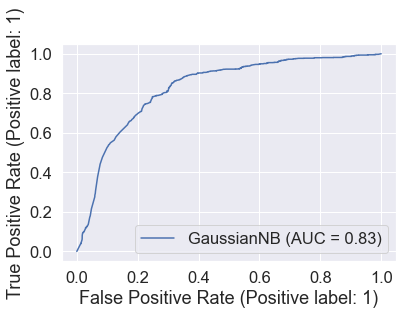

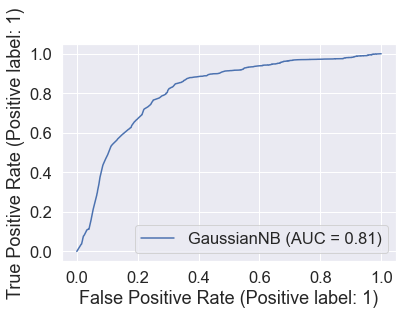

In [102]:
metrics.plot_roc_curve(clf, xtest, ytest) 
plt.show()
metrics.plot_roc_curve(clf, xtrain, ytrain) 
plt.show()


# Logistic Regression

In [55]:
reg = LogisticRegression()
reg.fit(xtrain, ytrain)
y_pred = reg.predict(xtest)
y_pred1 = reg.predict(xtrain)
print("Test data")
print(classification_report(ytest, y_pred))
print("Train data")
print(classification_report(ytrain, y_pred1))

Test data
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4346
           1       0.64      0.53      0.58      1410

    accuracy                           0.81      5756
   macro avg       0.75      0.72      0.73      5756
weighted avg       0.80      0.81      0.81      5756

Train data
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     17254
           1       0.66      0.52      0.58      5769

    accuracy                           0.81     23023
   macro avg       0.75      0.72      0.73     23023
weighted avg       0.80      0.81      0.80     23023



c:\users\lasya\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred1))

Accuracy: 0.8130646282140376
Accuracy: 0.8122746818398993


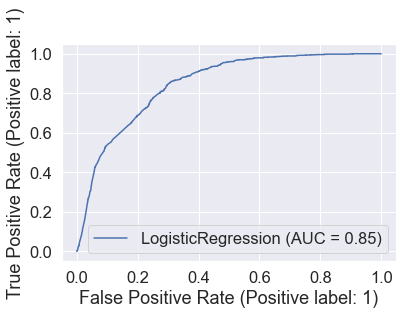

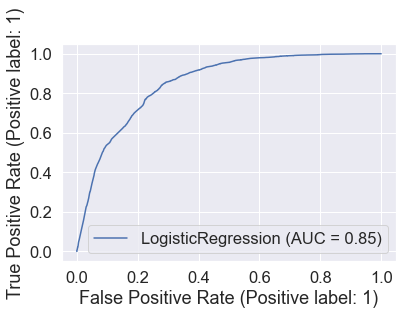

In [57]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(reg, xtest, ytest) 
plt.show()
metrics.plot_roc_curve(reg, xtrain, ytrain) 
plt.show()

# Random Forest

In [58]:
rf = RandomForestClassifier(max_depth=20,n_estimators=200, min_samples_leaf=1,min_samples_split=50,criterion='entropy', oob_score=True,random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [59]:
predicted = rf.predict(xtest)
accuracy = metrics.accuracy_score(ytest, predicted)
print(f'Mean accuracy score: {accuracy:.3}')
predicted1 = rf.predict(xtrain)
accuracy = metrics.accuracy_score(ytrain, predicted1)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.813
Mean accuracy score: 0.818


In [60]:
print("Test data")
print(classification_report(ytest, predicted))
print("Train data")
print(classification_report(ytrain, predicted1))

Test data
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4346
           1       0.64      0.53      0.58      1410

    accuracy                           0.81      5756
   macro avg       0.75      0.72      0.73      5756
weighted avg       0.80      0.81      0.81      5756

Train data
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     17254
           1       0.67      0.54      0.60      5769

    accuracy                           0.82     23023
   macro avg       0.76      0.73      0.74     23023
weighted avg       0.81      0.82      0.81     23023



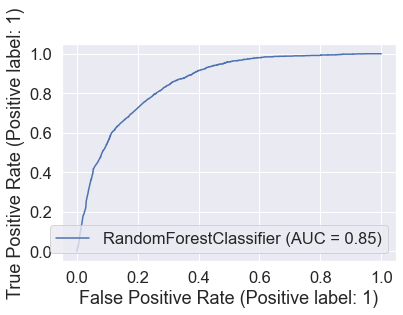

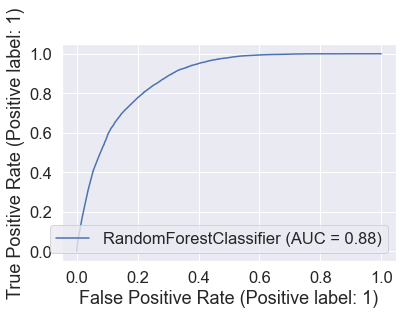

In [61]:
import matplotlib.pyplot as plt
metrics.plot_roc_curve(rf, xtest, ytest) 
plt.show()
metrics.plot_roc_curve(rf, xtrain, ytrain) 
plt.show()

# Data preprocessing experimentation, resulted in lesser accuracy.

In [103]:
data = pd.read_csv('adult .csv')
data_test = pd.read_csv('adult_test.csv')
data.replace(' ?', np.NaN,inplace=True)  #finding ? characters  
data_test.replace(' ?', np.NaN,inplace=True) 

data.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]  
data_test.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"] 

In [104]:
data.dropna(how='any',inplace=True)
data_test.dropna(how='any',inplace=True)

In [105]:
data_test.isnull().sum()
data['Income']=data["Income"].map({' <=50K':0,' >50K':1})
data_test['Income']=data_test["Income"].map({' <=50K.':0,' >50K.':1})

In [106]:
data.drop(['EducationNum','Age', 'fnlwgt', 'CapitalGain','CapitalLoss'], axis=1, inplace=True)
data_test.drop(['EducationNum','Age', 'fnlwgt', 'CapitalGain','CapitalLoss'], axis=1, inplace=True)

In [107]:
data['NativeCountry']=[ 0 if i == ' United-States'  else 1 for i in data['NativeCountry']]
data['HoursPerWeek']=[ 0 if i >=40  else 1 for i in data['HoursPerWeek']]
data_test['NativeCountry']=[ 0 if i == ' United-States'  else 1 for i in data_test['NativeCountry']]
data_test['HoursPerWeek']=[ 0 if i >=40  else 1 for i in data_test['HoursPerWeek']]

In [108]:
data['Gender']=[ 0 if i == ' Male'  else 1 for i in data['Gender']]
data['Race'] = data['Race'].map({' Black': 0, ' Asian-Pac-Islander': 1,' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4})
data['MaritalStatus'] = data['MaritalStatus'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6})
data['WorkClass'] = data['WorkClass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6})
data['Education'] = data['Education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15})
data['Occupation'] = data['Occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, 
 ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14})
data['Relationship'] = data['Relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5})

In [109]:
data_test['Gender']=[ 0 if i == ' Male'  else 1 for i in data_test['Gender']]
data_test['Race'] = data_test['Race'].map({' Black': 0, ' Asian-Pac-Islander': 1,' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4})
data_test['MaritalStatus'] = data_test['MaritalStatus'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6})
data_test['WorkClass'] = data_test['WorkClass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6})
data_test['Education'] = data_test['Education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15})
data_test['Occupation'] = data_test['Occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, 
 ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14})
data_test['Relationship'] = data_test['Relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5})

<AxesSubplot:xlabel='NativeCountry'>

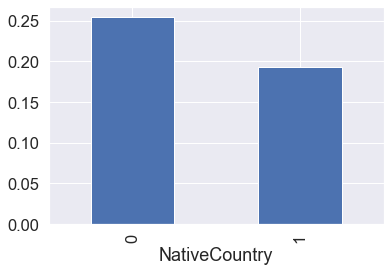

In [110]:
data.groupby('NativeCountry').Income.mean().plot(kind='bar')

Dividing into two classes - USA and Non-USA

In [111]:
x_train=data.drop("Income",axis=1)
y_train=data['Income']
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [112]:
x_test=data_test.drop("Income",axis=1)
y_test=data_test['Income']
y_pred = reg.predict(x_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7657214954512251
